<a href="https://colab.research.google.com/github/Pragnesh260/Player-Performance-Predictor-NBA/blob/main/Player_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBA Player Performance Prediction**

In [2]:
# All imports of libraries go into this cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.api as sm
from matplotlib_venn import venn3
from matplotlib import pyplot
from google.colab import files
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from itertools import combinations

In [3]:
# Reading the NBA Players dataset
nba_df = pd.read_csv(
    "/content/drive/MyDrive/all_seasons.csv"
)

In [ ]:
nba_df.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,None,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


In [4]:
nba_df.drop(columns='Unnamed: 0',inplace = True)

In [ ]:
nba_df.head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,47,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,None,USA,1993,2,30,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,4,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


In [ ]:
nba_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


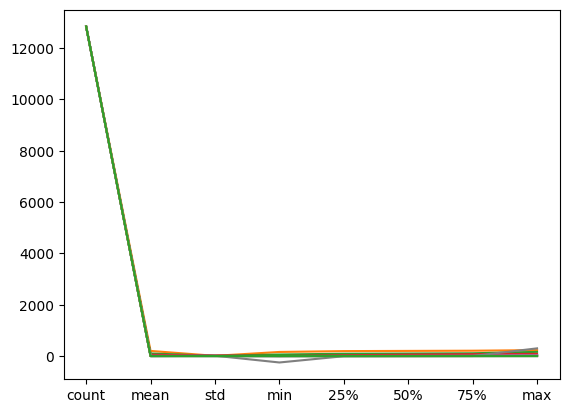

In [ ]:
plt.plot(nba_df.describe())

In [5]:
# Make a deep copy of the original DataFrame
nba_df_copy = nba_df.copy(deep=True)

#### Analyzing the relationship between assists and points.

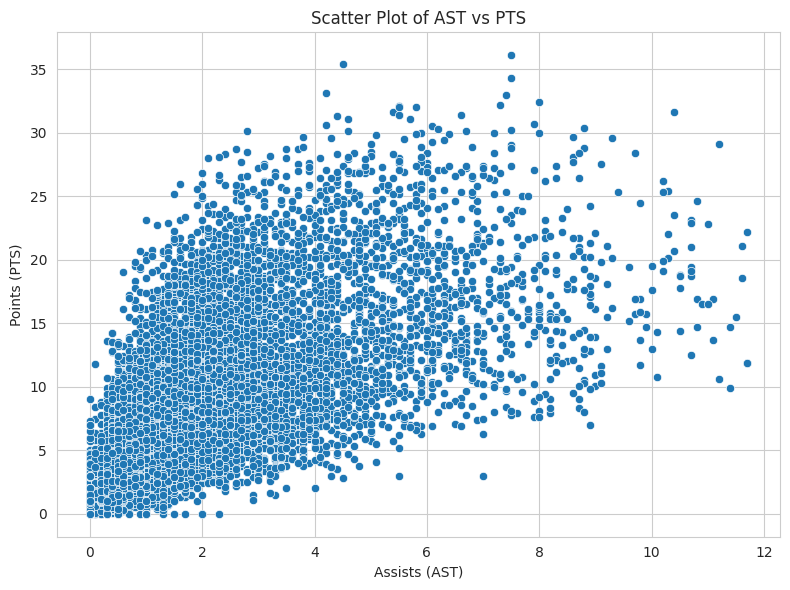

<Figure size 800x600 with 0 Axes>

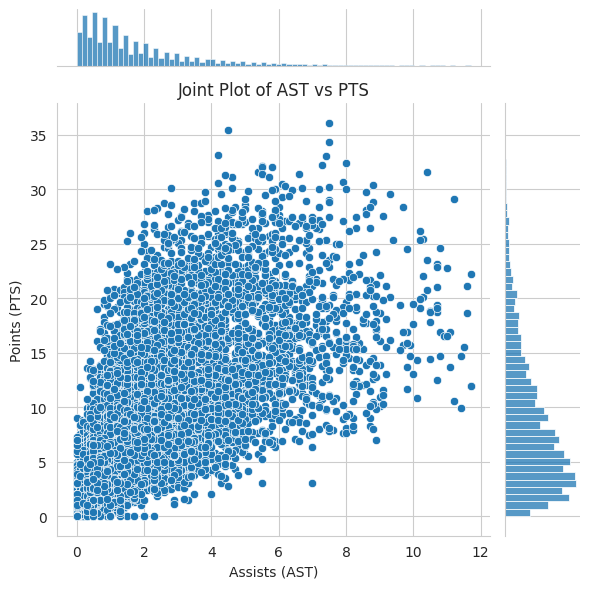

<Figure size 800x600 with 0 Axes>

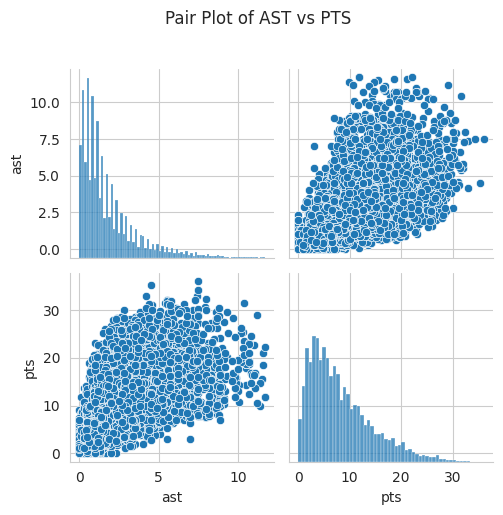

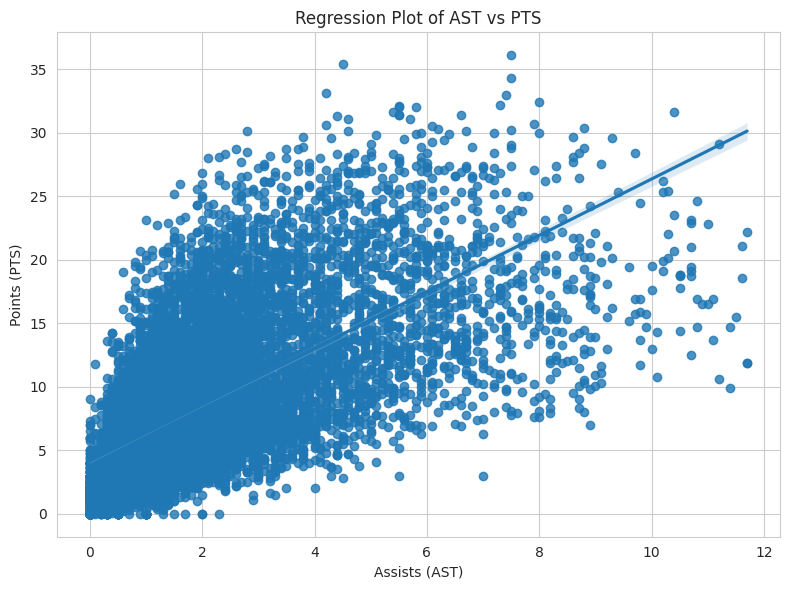

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_df, x='ast', y='pts')
plt.title('Scatter Plot of AST vs PTS')
plt.xlabel('Assists (AST)')
plt.ylabel('Points (PTS)')
plt.tight_layout()
plt.show()

# Joint plot
plt.figure(figsize=(8, 6))
sns.jointplot(data=nba_df, x='ast', y='pts', kind='scatter').set_axis_labels("Assists (AST)", "Points (PTS)")
plt.title('Joint Plot of AST vs PTS')
plt.tight_layout()
plt.show()

# Pair plot
plt.figure(figsize=(8, 6))
sns.pairplot(nba_df[['ast', 'pts']])
plt.suptitle('Pair Plot of AST vs PTS', y=1.02)
plt.tight_layout()
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(data=nba_df, x='ast', y='pts')
plt.title('Regression Plot of AST vs PTS')
plt.xlabel('Assists (AST)')
plt.ylabel('Points (PTS)')
plt.tight_layout()
plt.show()

As you can see there seems to be pretty good linear relationship between assists and points, indicating that racking up more assists gives you a good chance of scoring more points as well. This contradicts popular thought that giving the ball up would result in a player scoring fewer points.

## **Correlation Matrix**

This is done only for numerical columns.

In [ ]:
nba_df.corr()

<ipython-input-13-ded3be66b2f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nba_df.corr()


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.007904,0.063561,0.057442,0.011353,0.037386,0.092359,0.092896,-0.055228,0.018774,-0.113882,0.025245,0.069029
player_height,-0.007904,1.000000,0.822141,0.004963,-0.055284,0.424220,-0.442781,-0.003074,0.589538,0.614273,-0.104011,0.076797,-0.608696
player_weight,0.063561,0.822141,1.000000,0.022828,-0.025023,0.438112,-0.371675,0.003547,0.599511,0.605639,-0.065811,0.070992,-0.521939
gp,0.057442,0.004963,0.022828,1.000000,0.536003,0.471405,0.382726,0.248412,-0.014763,0.067911,0.147248,0.367876,0.131720
pts,0.011353,-0.055284,-0.025023,0.536003,1.000000,0.624509,0.664320,0.215199,-0.125164,0.055669,0.641469,0.373439,0.337339
reb,0.037386,0.424220,0.438112,0.471405,0.624509,1.000000,0.247841,0.187820,0.407960,0.611899,0.232968,0.313451,-0.062654
ast,0.092359,-0.442781,-0.371675,0.382726,0.664320,0.247841,1.000000,0.162865,-0.337970,-0.192146,0.396505,0.174494,0.803150
net_rating,0.092896,-0.003074,0.003547,0.248412,0.215199,0.187820,0.162865,1.000000,0.055761,0.047928,0.026575,0.313251,0.063809
oreb_pct,-0.055228,0.589538,0.599511,-0.014763,-0.125164,0.407960,-0.337970,0.055761,1.000000,0.555358,-0.100091,0.060572,-0.424056
dreb_pct,0.018774,0.614273,0.605639,0.067911,0.055669,0.611899,-0.192146,0.047928,0.555358,1.000000,-0.007402,0.105150,-0.317477


#### Analyzing relationship between draft number and points scored

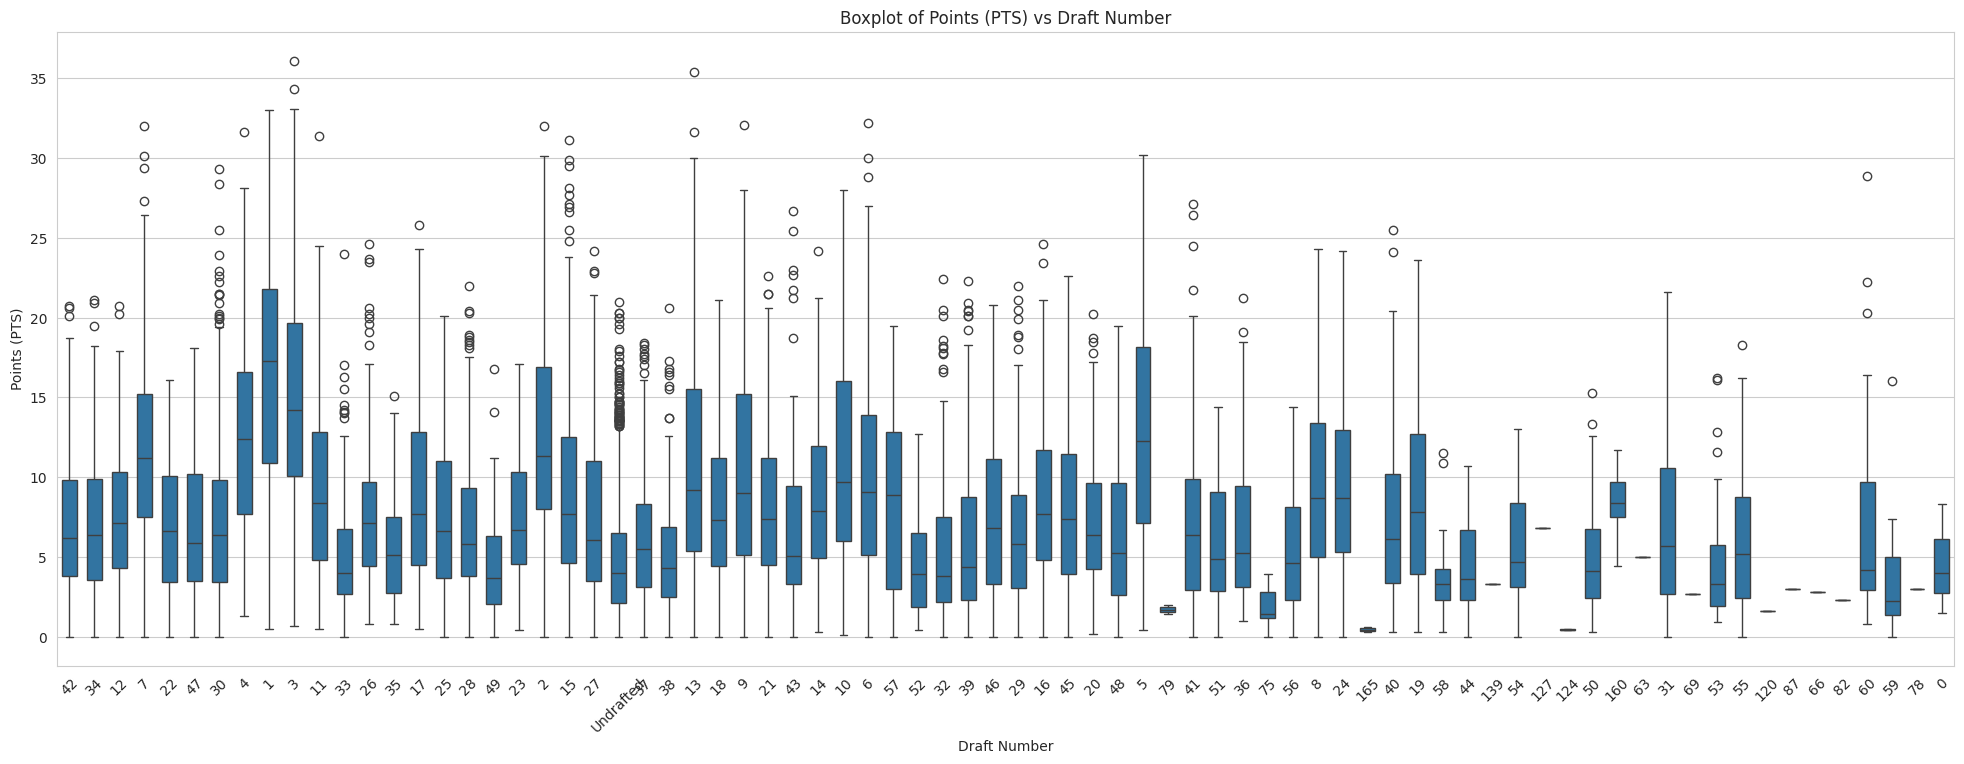

In [ ]:
# Increase plot size and rotate x-tick labels
plt.figure(figsize=(20, 8))  # Increase plot size
sns.boxplot(data=nba_df, x='draft_number', y='pts', width=0.6)  # Adjust box width
plt.title('Boxplot of Points (PTS) vs Draft Number')
plt.xlabel('Draft Number')
plt.ylabel('Points (PTS)')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.tight_layout(pad=2.0)  # Add more space around the plot
plt.show()

## **Creating training, validation and test sets**

Considering just one predictor variable - Assists

In [6]:
# Extract the target variable (pts) from the DataFrame
y_train = nba_df["pts"]
X = nba_df[['ast']]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_train, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the testing data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_test, y_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 20.83333304210091
R-squared (Test): 0.43882001398369097
Mean Squared Error (Validation): 19.149439491374302
R-squared (Validation): 0.43882001398369097


#### Adding usg_pct into the regression model to see how it improves

In [ ]:
# Prepare the data
X = nba_df[['ast', 'usg_pct']]  # Predictor variables
y = nba_df['pts']                # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 13.633395144661492
R-squared (Test): 0.6327621470277991
Mean Squared Error (Validation): 12.945487516440885
R-squared (Validation): 0.6416208228908938


There exists some interaction effect between assists and usg_pct. Exploring to see if the model improves accuracy after including interaction term.

In [ ]:
# Create interaction term
nba_df['ast_usg_interaction'] = nba_df['ast'] * nba_df['usg_pct']

# Prepare the data
X = nba_df[['ast', 'usg_pct', 'ast_usg_interaction']]  # Include interaction term
y = nba_df['pts']                                       # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 12.5423872068868
R-squared (Test): 0.6621502347632957
Mean Squared Error (Validation): 12.425635992151923
R-squared (Validation): 0.6560122439367977


The interaction term does improve the accuracy of the model, albeit to not a great extent.

Adding rebounds into the model along with the interaction effect considered.

In [ ]:
# Create interaction terms for all combinations of predictor variables
interaction_terms = []
for combo in combinations(['ast', 'usg_pct', 'reb'], 2):
    interaction_term = f"{combo[0]}_{combo[1]}_interaction"
    nba_df[interaction_term] = nba_df[combo[0]] * nba_df[combo[1]]
    interaction_terms.append(interaction_term)

# Prepare the data
X = nba_df[['ast', 'usg_pct', 'reb'] + interaction_terms]  # Include main effects and interaction terms
y = nba_df['pts']                                         # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 5.7237823810149155
R-squared (Test): 0.8458205362508606
Mean Squared Error (Validation): 5.714132466796241
R-squared (Validation): 0.841811589656851


As you can see, including the interaction effect between all predictor variables improved the accuracy of the model to a greater extent when compared to including another predictor variable into the mix.

#### Including top 4 variables that have high correlation coefficients

In [ ]:
# Prepare the data
X = nba_df[['ast', 'usg_pct', 'reb', 'gp']]  # Predictor variables
y = nba_df['pts']                # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 6.767279492878265
R-squared (Test): 0.8177122305150406
Mean Squared Error (Validation): 6.850328359048242
R-squared (Validation): 0.810357467254517


Checking if the three-way interaction between variables makes a big difference to the accuracy of the model

In [ ]:
# Create interaction terms for all combinations of predictor variables
interaction_terms = []
for combo in combinations(['ast', 'usg_pct', 'reb'], 2):
    interaction_term = f"{combo[0]}_{combo[1]}_interaction"
    nba_df[interaction_term] = nba_df[combo[0]] * nba_df[combo[1]]
    interaction_terms.append(interaction_term)

# Create interaction term for three-way interaction between all three variables
three_way_interaction_term = 'ast_usg_pct_reb_interaction'
nba_df[three_way_interaction_term] = nba_df['ast'] * nba_df['usg_pct'] * nba_df['reb']
interaction_terms.append(three_way_interaction_term)

# Prepare the data
X = nba_df[['ast', 'usg_pct', 'reb'] + interaction_terms]  # Include main effects and interaction terms
y = nba_df['pts']                                         # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 5.676833302894329
R-squared (Test): 0.8470851866526924
Mean Squared Error (Validation): 5.461823808608085
R-squared (Validation): 0.8487964304505358


In [9]:
numeric_columns = ['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast',
                   'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

# Create interaction terms for all combinations of numeric columns
interaction_terms = []

# Generate interaction terms
for order in range(2, 4):
    for combo in combinations(numeric_columns, order):
        interaction_term = "_".join(combo) + "_interaction"
        interaction = 1
        for col in combo:
            interaction *= nba_df[col]
        interaction_terms.append(interaction)

# Concatenate the interaction terms with the numeric columns
X = pd.concat([nba_df[numeric_columns], pd.DataFrame(interaction_terms).T], axis=1)

# Target variable
y = nba_df['pts']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

Mean Squared Error (Test): 0.3057084148197315
R-squared (Test): 0.991765242575112
Mean Squared Error (Validation): 0.33011084665925206
R-squared (Validation): 0.9908613056533958


Including interaction terms into the mix for all numerical columns generates a model with an MSE of just 0.305.

#### Analyzing the correlation between categorical columns and points scored

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


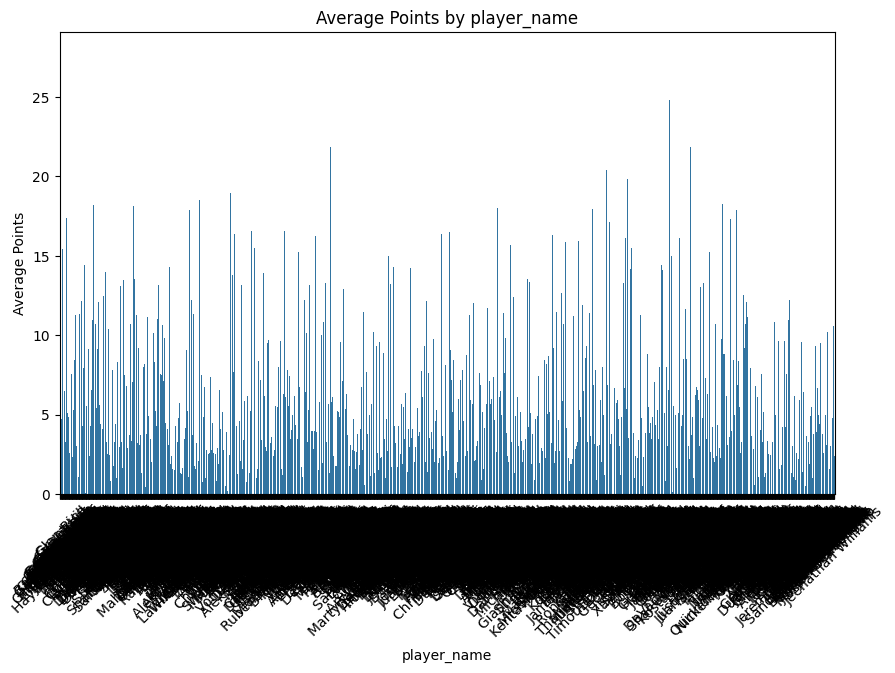

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


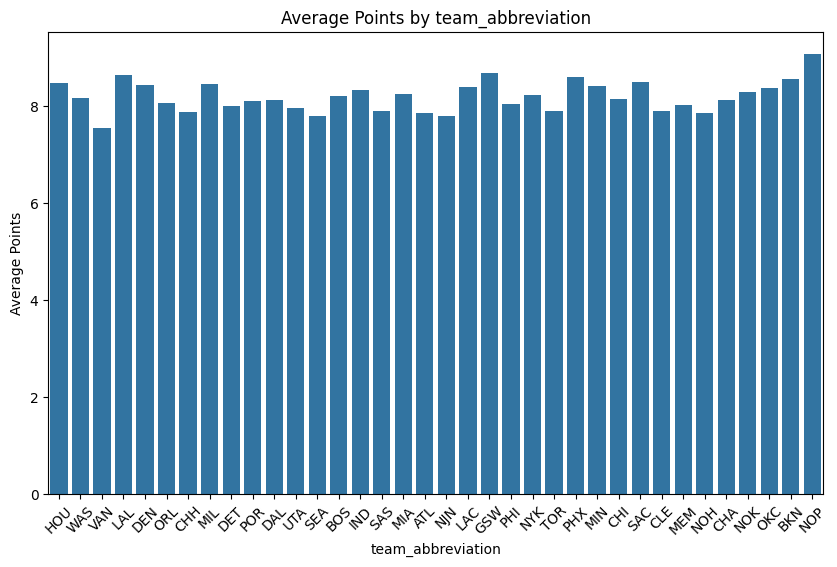

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


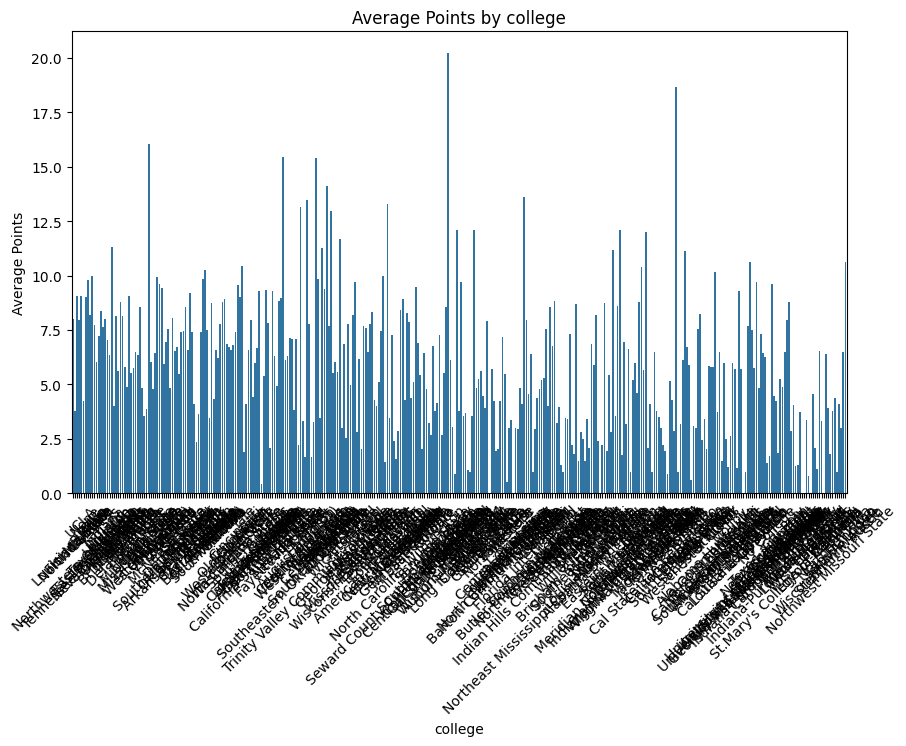

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


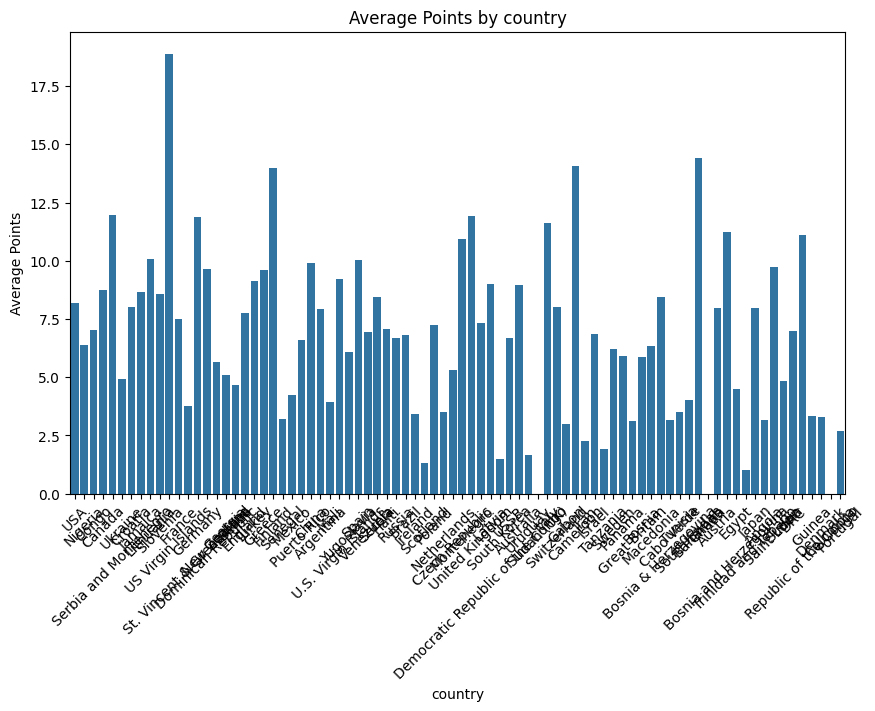

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


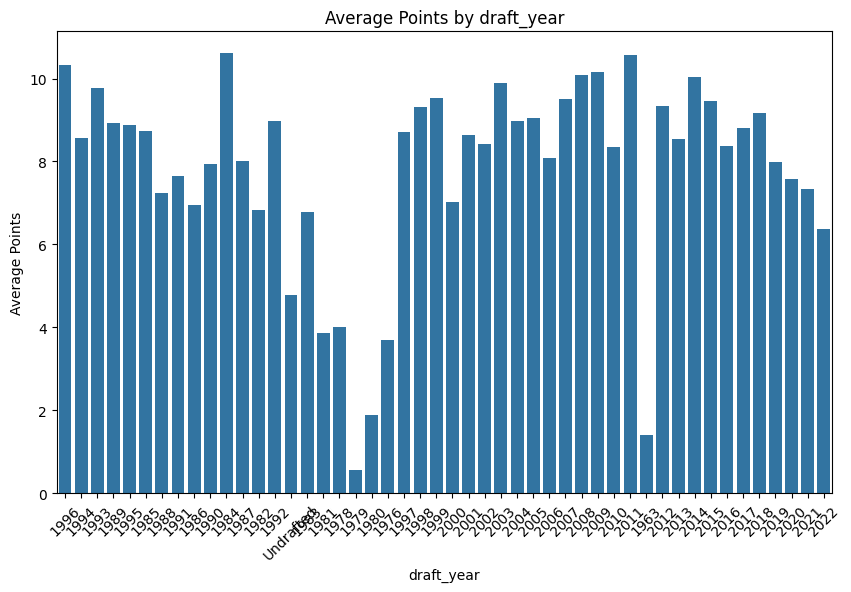

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


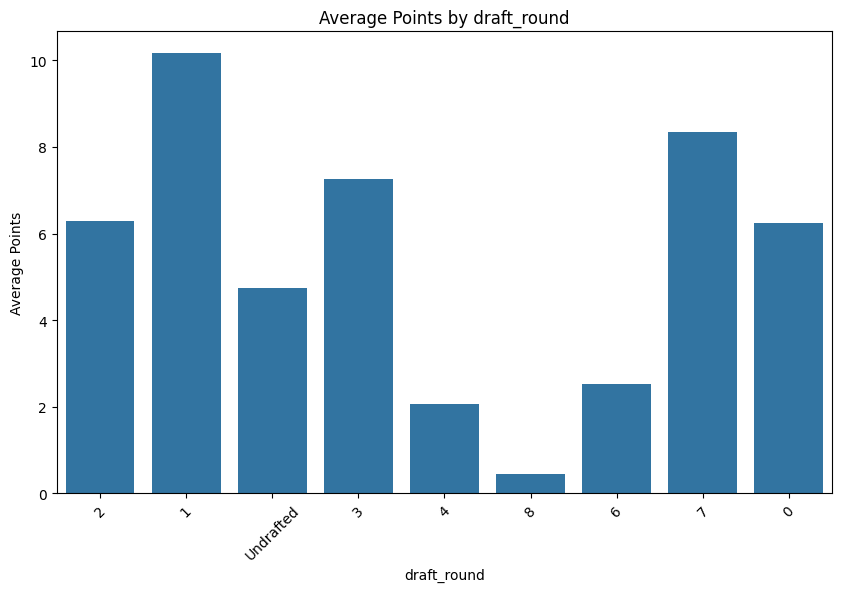

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


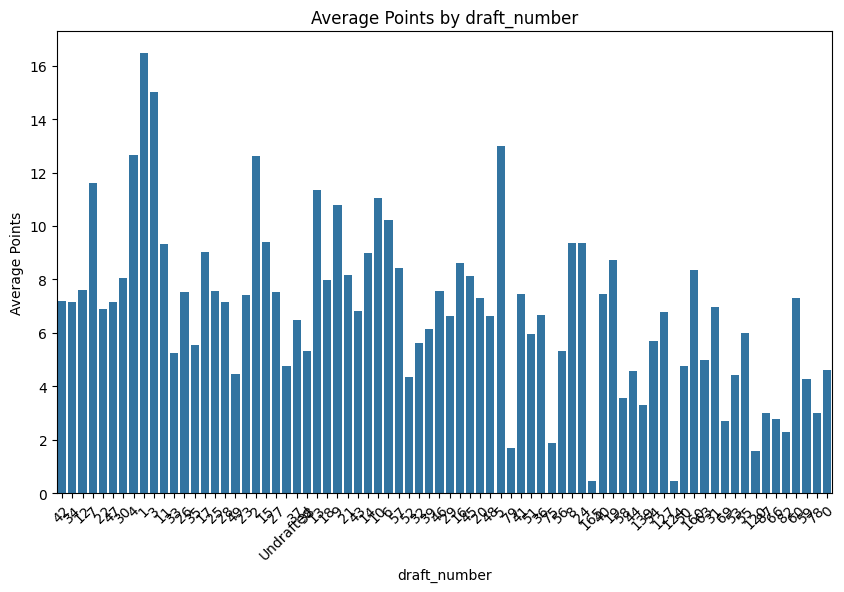

<ipython-input-8-550a2730231a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='pts', data=nba_df, ci=None)


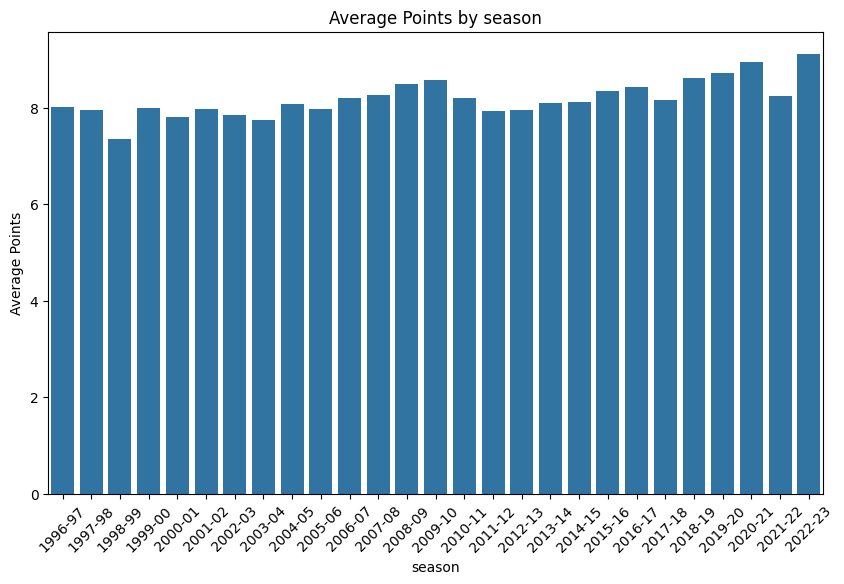

In [8]:
# Categorical columns
categorical_columns = ['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season']

# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='pts', data=nba_df, ci=None)
    plt.title(f'Average Points by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Points')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
encoded_categorical_columns = pd.get_dummies(nba_df[categorical_columns])

# Create interaction terms for all combinations of numeric columns
interaction_terms = []

# Concatenate numeric and encoded categorical columns
all_columns = numeric_columns + list(encoded_categorical_columns.columns)

# Generate interaction terms
for order in range(2, 4):
    for combo in combinations(numeric_columns, order):
        interaction_term = "_".join(combo) + "_interaction"
        interaction = 1
        for col in combo:
            interaction *= nba_df[col]
        nba_df[interaction_term] = interaction
        interaction_terms.append(interaction_term)

# Concatenate the encoded categorical columns, interaction terms, and numerical predictor variables
X = pd.concat([nba_df[numeric_columns], encoded_categorical_columns, nba_df[interaction_terms]], axis=1)

# Target variable
y = nba_df['pts']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model (test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Evaluate the model (validation)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)

print("Mean Squared Error (Validation):", mse_val)
print("R-squared (Validation):", r2_val)

<ipython-input-10-341cc2d43e96>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_df[interaction_term] = interaction
<ipython-input-10-341cc2d43e96>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_df[interaction_term] = interaction
<ipython-input-10-341cc2d43e96>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

Mean Squared Error (Test): 0.27937850160736094
R-squared (Test): 0.9924744819607864
Mean Squared Error (Validation): 0.3298784870481317
R-squared (Validation): 0.9908677382304711
